In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import math
%matplotlib inline
os.chdir("G:\\New Folder\\hacker_stock")

In [6]:
data = pd.read_csv('trainData.csv')
w = pd.read_csv('testData.csv')
data = pd.concat([data , w] , axis=0)

In [14]:
np.sum(w['nBestBuyOrderPrice'] >= w['nBestSellOrderPrice'])

51

In [5]:
data.head()

,nSerialNumber,TimeStamp,sSymbol,nBestBuyOrderPrice,nBestBuyOrderQuantity,nBestSellOrderPrice,nBestSellOrderQuantity,nLastTradedPrice,nTotalTradedQuantity
0,1,01-09-2017 09:15,XYZ Corporation,1173.05,26,1174.20,335,1173.00,2850
1,2,01-09-2017 09:15,XYZ Corporation,1172.10,5,1172.95,21,1172.95,3049
2,3,01-09-2017 09:15,XYZ Corporation,1172.00,163,1172.10,6,1172.00,3112
3,4,01-09-2017 09:15,XYZ Corporation,1172.00,23,1172.90,26,1172.00,3384
4,5,01-09-2017 09:15,XYZ Corporation,1171.00,111,1171.05,9,1171.00,3579


In [6]:
data.shape

(99347, 9)

In [7]:
w.shape

(82748, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99347 entries, 0 to 82747
Data columns (total 9 columns):
nSerialNumber             99347 non-null int64
TimeStamp                 99347 non-null object
sSymbol                   99347 non-null object
nBestBuyOrderPrice        99347 non-null float64
nBestBuyOrderQuantity     99347 non-null int64
nBestSellOrderPrice       99347 non-null float64
nBestSellOrderQuantity    99347 non-null int64
nLastTradedPrice          16599 non-null float64
nTotalTradedQuantity      99347 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [9]:
data['nTotalTradedQuantity'].describe()

count    9.934700e+04
mean     3.820876e+05
std      3.034174e+05
min      5.000000e+00
25%      1.554780e+05
50%      2.920390e+05
75%      5.401590e+05
max      1.523879e+06
Name: nTotalTradedQuantity, dtype: float64

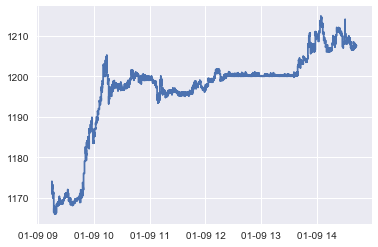

In [10]:
plt.plot(pd.to_datetime(data['TimeStamp'].iloc[0:16000]), data['nLastTradedPrice'].iloc[0:16000])
plt.show()



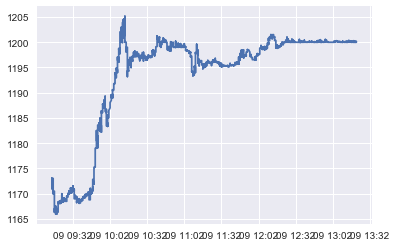

In [163]:
plt.plot(pd.to_datetime(data['TimeStamp'].iloc[0:12000]), data['nBestBuyOrderPrice'].iloc[0:12000])
plt.show()

In [11]:
date = pd.to_datetime(data['TimeStamp']) - pd.to_datetime(data['TimeStamp'].min()) 

In [46]:
data_1 = pd.DataFrame()


In [64]:
date2 = pd.to_datetime(data['TimeStamp'])

In [65]:
date2.dt.hour.value_counts()

10    16263
14    16259
11    14899
9     14612
12    14071
13    13280
15     9963
Name: TimeStamp, dtype: int64

In [66]:
data_1['time'] =  date2.dt.minute + date2.dt.hour*60

In [47]:
data_1['sSymbol'] = data['sSymbol'].apply(lambda x: 0  if(x =='XYZ Corp') else(1))

In [195]:
k=0
for i in range(16599):
    if data['nBestSellOrderPrice'].iloc[i] < 1000 :
        k+=1
        
print(k)

0


In [49]:
data_1['nBestBuyOrderPrice'] = data['nBestBuyOrderPrice']
data_1['nBestSellOrderPrice'] = data['nBestSellOrderPrice']
#data_1['nBestSellOrderQuantity'] = data['nBestSellOrderQuantity']
#data_1['nTotalTradedQuantity'] = data['nTotalTradedQuantity']
data_1['nLastTradedPrice'] = data['nLastTradedPrice']

In [ ]:
w.shape

In [67]:
train = data_1.iloc[:16599,:]
#train = train.drop(['nLastTradedPrice'] , axis=1)
test = data_1.iloc[16599:,:]

In [74]:
test['nBestSellOrderPrice'] = test['nBestSellOrderPrice'].apply(lambda x: np.mean(test['nBestSellOrderPrice'] if x > 1300 else x))
#test['nBestSellOrderPrice'] = test['nBestSellOrderPrice'].apply(lambda x: np.mean(test['nBestSellOrderPrice'] if x < 1000 else x))
test['nBestBuyOrderPrice'] = test['nBestBuyOrderPrice'].apply(lambda x: np.mean(test['nBestBuyOrderPrice'] if x < 1000 else x))
#test['nBestSellOrderQuantity'] = test['nBestSellOrderQuantity'].apply(lambda x: np.mean(test['nBestSellOrderQuantity'] if x > 3000 else x))
#test['nBestBuyOrderQuantity'] = test['nBestBuyOrderQuantity'].apply(lambda x: np.mean(test['nBestBuyOrderQuantity'] if x > 4000 else x))
#test['nTotalTradedQuantity'] = test['nTotalTradedQuantity'].apply(lambda x: np.mean(test['nTotalTradedQuantity'] if x > 1000000 else x))

C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
train['nBestBuyOrderPrice'] = train['nBestBuyOrderPrice'].apply(lambda x: np.mean(train['nBestBuyOrderPrice'] if x < 1000 else x))
#train['nBestSellOrderQuantity'] = train['nBestSellOrderQuantity'].apply(lambda x: np.mean(train['nBestSellOrderQuantity'] if x > 4000 else x))
#train['nBestBuyOrderQuantity'] = train['nBestBuyOrderQuantity'].apply(lambda x: np.mean(train['nBestBuyOrderQuantity'] if x > 3500 else x))
train['nTotalTradedQuantity'] = train['nTotalTradedQuantity'].apply(lambda x: np.mean(train['nTotalTradedQuantity'] if x < 4000 else x))

C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyError: 'nTotalTradedQuantity'

In [68]:
Y = 'nLastTradedPrice'
X = [x for x in train.columns if x not in [Y]]
#X = ['nBestSellOrderPrice']

In [69]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [53]:
regr.fit(train[X], train[Y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
pred = regr.predict(test[X])
k = pd.DataFrame()
k['nLastTradedPrice']  = regr.predict(test[X])


In [32]:
k['nLastTradedPrice'] = (round(k['nLastTradedPrice'],1))

In [55]:
k.to_csv('2.csv' , index=False)

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(train[X] , label = train[Y])

In [ ]:
param = {'num_leaves':100, 'objective':'binary','max_depth':5,'learning_rate':.09,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
num_round=80
lgbm=lgb.train(param,train_data,num_round)

In [ ]:
ypred=lgbm.predict(test[X])
k['nLastTradedPrice'] = ypred
k.to_csv('2.csv' , index=False)

In [190]:
data.corr()

,nSerialNumber,nBestBuyOrderPrice,nBestBuyOrderQuantity,nBestSellOrderPrice,nBestSellOrderQuantity,nLastTradedPrice,nTotalTradedQuantity
nSerialNumber,1.000000,0.007238,-0.040152,-0.013417,-0.066175,0.821622,-0.386450
nBestBuyOrderPrice,0.007238,1.000000,-0.003092,0.178382,-0.012575,0.767235,-0.030471
nBestBuyOrderQuantity,-0.040152,-0.003092,1.000000,-0.025623,-0.027651,0.043779,0.083881
nBestSellOrderPrice,-0.013417,0.178382,-0.025623,1.000000,0.029166,0.999730,0.023564
nBestSellOrderQuantity,-0.066175,-0.012575,-0.027651,0.029166,1.000000,0.033005,0.088192
nLastTradedPrice,0.821622,0.767235,0.043779,0.999730,0.033005,1.000000,0.918779
nTotalTradedQuantity,-0.386450,-0.030471,0.083881,0.023564,0.088192,0.918779,1.000000
